In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
import pickle

In [3]:
with open('boards.pkl','rb') as f: boards = pickle.load(f)

In [4]:
import matplotlib.pyplot as plt

In [5]:
#for MOVE in range(boards.shape[0]):
    #plt.figure()
    #plt.imshow(boards[MOVE])

In [6]:
from copy import deepcopy

In [7]:
moves = []
pred = []
for MOVE in range(boards.shape[0] - 1):
    moves.append(boards[MOVE].reshape(6*7))
    pred.append(deepcopy(boards[MOVE+1].reshape(6*7)))

In [8]:
#Normalize pred
for MOVE in range(boards.shape[0] - 1):
    pred[MOVE] -= deepcopy(moves[MOVE])
    if pred[MOVE].sum() > 1:
        pred[MOVE] /= 2

In [9]:
moves = np.array(moves)
pred = np.array(pred)

In [10]:
#Remove transitions between games
index = np.abs(pred.sum(1)) == 1
moves = moves[index]
pred = pred[index]

In [28]:
model = Sequential()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)
model.add(keras.Input(shape=(42)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(42, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               8600      
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 42)                8442      
                                                                 
Total params: 17,042
Trainable params: 17,042
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(moves,pred, batch_size=128,
          epochs=200,  callbacks=[callback], validation_split=0.1)

Epoch 1/200
7/7 [==============================] - 1s 26ms/step - loss: 3.8696 - accuracy: 0.0320 - val_loss: 3.8791 - val_accuracy: 0.0638
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 3.7250 - accuracy: 0.0556 - val_loss: 3.7549 - val_accuracy: 0.0851
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 3.6214 - accuracy: 0.0793 - val_loss: 3.6820 - val_accuracy: 0.1170
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 3.5497 - accuracy: 0.0899 - val_loss: 3.6276 - val_accuracy: 0.0851
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 3.4721 - accuracy: 0.1207 - val_loss: 3.5773 - val_accuracy: 0.1170
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 3.4126 - accuracy: 0.1408 - val_loss: 3.5194 - val_accuracy: 0.1277
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 3.3404 - accuracy: 0.1633 - val_loss: 3.4630 - val_accuracy: 0.1489
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 12ms/step - loss: 1.5671 - accuracy: 0.5112 - val_loss: 2.0429 - val_accuracy: 0.3830
Epoch 60/200
7/7 [==============================] - 0s 12ms/step - loss: 1.5420 - accuracy: 0.5408 - val_loss: 2.0441 - val_accuracy: 0.3936
Epoch 61/200
7/7 [==============================] - 0s 19ms/step - loss: 1.5479 - accuracy: 0.5349 - val_loss: 2.0444 - val_accuracy: 0.4043
Epoch 62/200
7/7 [==============================] - 0s 12ms/step - loss: 1.5406 - accuracy: 0.5325 - val_loss: 2.0460 - val_accuracy: 0.3830
Epoch 63/200
7/7 [==============================] - 0s 12ms/step - loss: 1.5390 - accuracy: 0.5408 - val_loss: 2.0359 - val_accuracy: 0.3936
Epoch 64/200
7/7 [==============================] - 0s 27ms/step - loss: 1.5098 - accuracy: 0.5503 - val_loss: 2.0156 - val_accuracy: 0.3936
Epoch 65/200
7/7 [==============================] - 0s 10ms/step - loss: 1.4987 - accuracy: 0.5479 - val_loss: 2.0078 - val_accuracy: 0.3936
Epoch 66/200
7/7 [========

7/7 [==============================] - 0s 8ms/step - loss: 1.1221 - accuracy: 0.6544 - val_loss: 2.0304 - val_accuracy: 0.3936
Epoch 118/200
7/7 [==============================] - 0s 17ms/step - loss: 1.1355 - accuracy: 0.6509 - val_loss: 1.9911 - val_accuracy: 0.3936
Epoch 119/200
7/7 [==============================] - 0s 14ms/step - loss: 1.1386 - accuracy: 0.6544 - val_loss: 1.9965 - val_accuracy: 0.3936
Epoch 120/200
7/7 [==============================] - 0s 12ms/step - loss: 1.0916 - accuracy: 0.6604 - val_loss: 1.9990 - val_accuracy: 0.3830
Epoch 121/200
7/7 [==============================] - 0s 12ms/step - loss: 1.1174 - accuracy: 0.6604 - val_loss: 2.0252 - val_accuracy: 0.4043
Epoch 122/200
7/7 [==============================] - 0s 10ms/step - loss: 1.1143 - accuracy: 0.6556 - val_loss: 2.0391 - val_accuracy: 0.3830
Epoch 123/200
7/7 [==============================] - 0s 9ms/step - loss: 1.0757 - accuracy: 0.6592 - val_loss: 2.0372 - val_accuracy: 0.3936
Epoch 124/200
7/7 [===

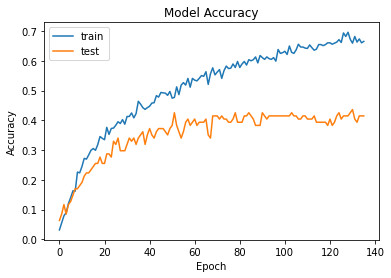

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])

In [35]:
#Board to give model to predict next move
new_board = [
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 1., 0., 0., 0., 0.],
[0., 0., 2., 2., 0., 0., 0.],
[0., 0., 2., 1., 1., 0., 0.]]

In [36]:
#Reshaped input board for model
shaped_board = np.array(new_board).reshape(1, 42)

1/1 [==============================] - 0s 7ms/step


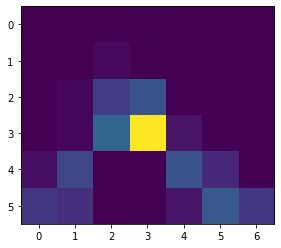

In [37]:
#Predict the next move and output heat map
predicted = model.predict(shaped_board)
plt.imshow(predicted.reshape(6,7))

In [18]:
out = deepcopy(predicted)

In [19]:
#Decide on highest probability move
value = out.argmax(axis=1)
while shaped_board[0][value] == 1:
    out[0][value] = 0
    value = out.argmax(axis=1)
value[0]

40

In [20]:
#Output next move 
space = 0
while space < 42:
    if space == value:
        out[0][space] = 1
    else:
        out[0][space] = 0
    space = space + 1
out.reshape(6,7)

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.]], dtype=float32)